In [13]:
# Import TF and TF Hub libraries.
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import os
%matplotlib inline

In [14]:
# Initialize the TFLite interpreter
interpreter = tf.lite.Interpreter(model_path="lite-model_movenet_singlepose_thunder_tflite_float16_4.tflite")

# Allocate memory for the interpreter's tensors
interpreter.allocate_tensors()

In [15]:
def movenet(input_image):
    """
    Perform pose estimation using the MoveNet model.

    Args:
        input_image (tf.Tensor): The input image for pose estimation.

    Returns:
        numpy.ndarray: Detected keypoints with confidence scores.
    """
    
    # Cast the image to uint8
    input_image = tf.cast(input_image, dtype=tf.uint8)
    
    # Get the input and output details from the interpreter
    input_details = interpreter.get_input_details()
    output_details = interpreter.get_output_details()
    
    # Set the input tensor for the interpreter
    interpreter.set_tensor(input_details[0]['index'], input_image.numpy())
    
    # Invoke the interpreter to perform pose estimation
    interpreter.invoke()
    
    # Get the output tensor containing keypoints with scores
    keypoints_with_scores = interpreter.get_tensor(output_details[0]['index'])
    
    return keypoints_with_scores

In [16]:
"""EDGES = [
    (0, 1), (0, 2), (1, 3), (2, 4),  # arms
    (5, 6), (5, 7), (7, 9), (6, 8), (8, 10),  # legs
    (5, 11), (6, 12), (11, 12),  # torso
    (11, 13), (12, 14), (13, 15), (14, 16)  # face
]"""

# Define the keypoints and edges
KEYPOINTS = ['nose', 'left_eye_inner', 'left_eye', 'left_eye_outer', 'right_eye_inner', 'right_eye', 'right_eye_outer', 'left_ear', 'right_ear', 'mouth_left', 'mouth_right', 'left_shoulder', 'right_shoulder', 'left_elbow', 'right_elbow', 'left_wrist', 'right_wrist', 'left_pinky', 'right_pinky', 'left_index', 'right_index', 'left_thumb', 'right_thumb', 'left_hip', 'right_hip', 'left_knee', 'right_knee', 'left_ankle', 'right_ankle', 'left_heel', 'right_heel', 'left_foot_index', 'right_foot_index']
connections = [(0, 1), (0, 2), (1, 3), (2, 4), (5, 6), (5, 7), (7, 9), (6, 8), (8, 10), (5, 11), (6, 12), (11, 12), (11, 13), (12, 14), (13, 15), (14, 16)]

In [17]:
def plot_keypoints_and_connections(image, keypoints_with_scores, connections, score_threshold=0.2, color=(0, 1, 0), line_width=2):
    """
    Plot keypoints and connections on an image.

    Args:
        image (numpy.ndarray): The input image.
        keypoints_with_scores (numpy.ndarray): Detected keypoints with confidence scores.
        connections (list of tuples): Defines connections between keypoints.
        score_threshold (float): The confidence score threshold for plotting keypoints.
        color (tuple): RGB color tuple for drawing connections.
        line_width (int): Width of the lines used for drawing connections.

    Returns:
        None
    """
    
    y, x = image.shape[:2]  # Get height and width

    # Scale keypoints based on image dimensions
    shaped = np.squeeze(np.multiply(keypoints_with_scores, [y,x,1]))

    # Normalize pixel values of the image
    normalized_image = image / 255.0  # Normalize pixel values

    # Display the normalized image
    plt.imshow(normalized_image)  

    # Plot keypoints above the confidence threshold
    for kp in range(17):
        ky, kx, kp_conf = shaped[kp]
        if kp_conf > score_threshold:
            plt.plot(kx, ky, 'ro')

    # Plot connections between keypoints
    for connection in connections:
        kp1, kp2 = connection
        y1, x1, _ = shaped[kp1]
        y2, x2, _ = shaped[kp2]

        # Draw a line between connected keypoints
        plt.plot([x1, x2], [y1, y2], color=color, linewidth=line_width)

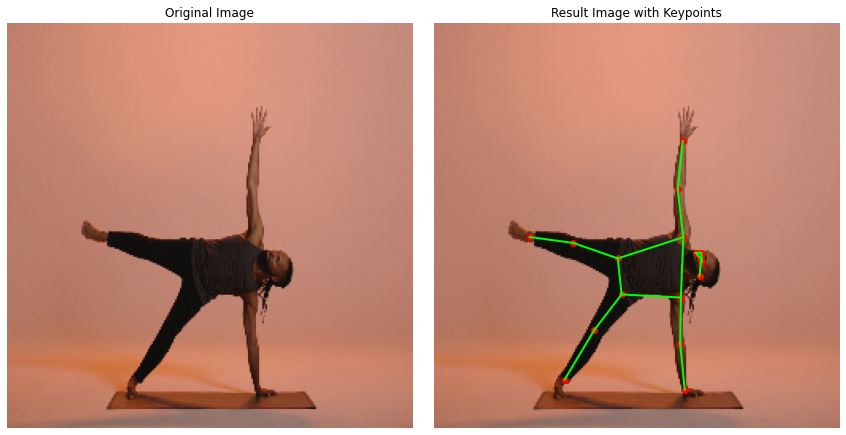


 **********************************************************************************************************************************


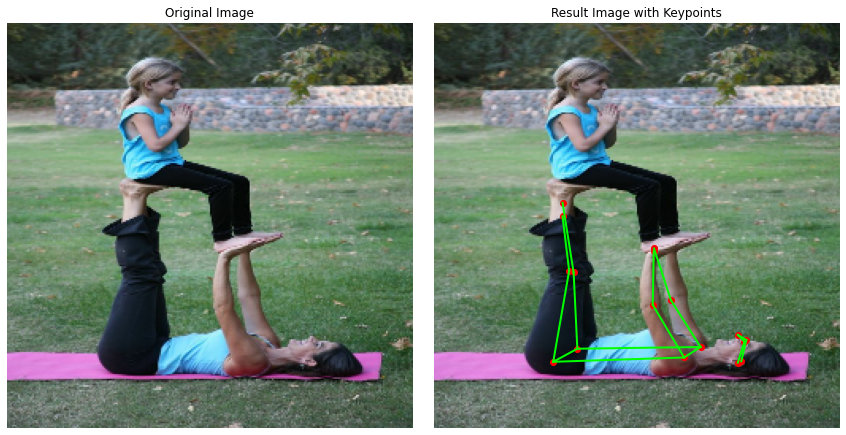


 **********************************************************************************************************************************


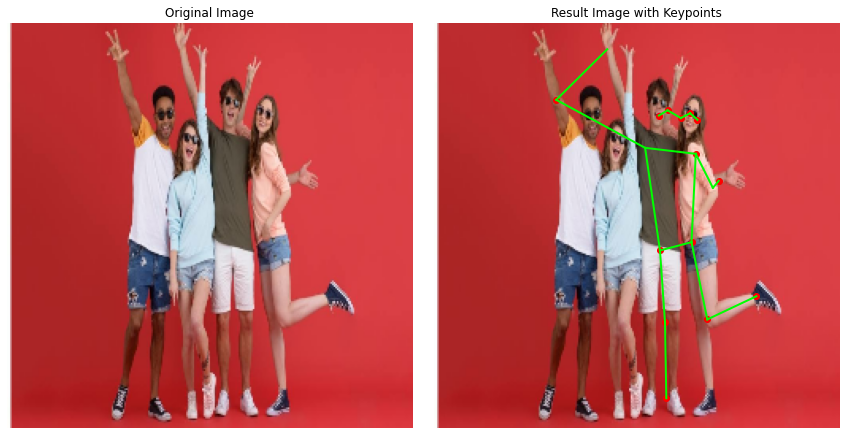


 **********************************************************************************************************************************


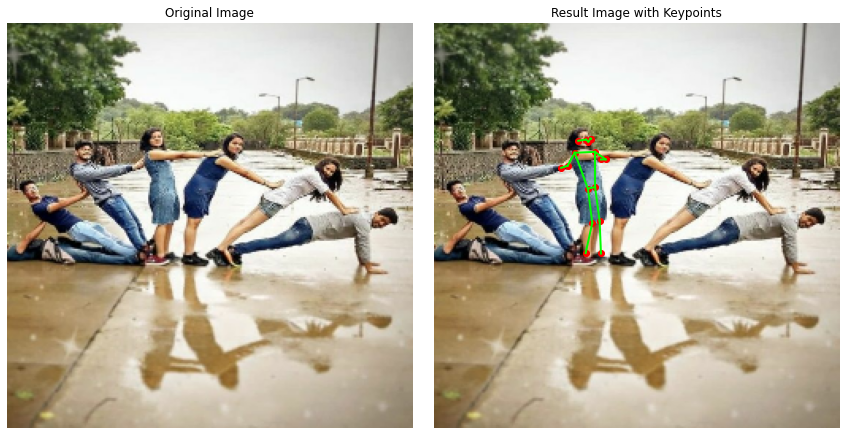


 **********************************************************************************************************************************


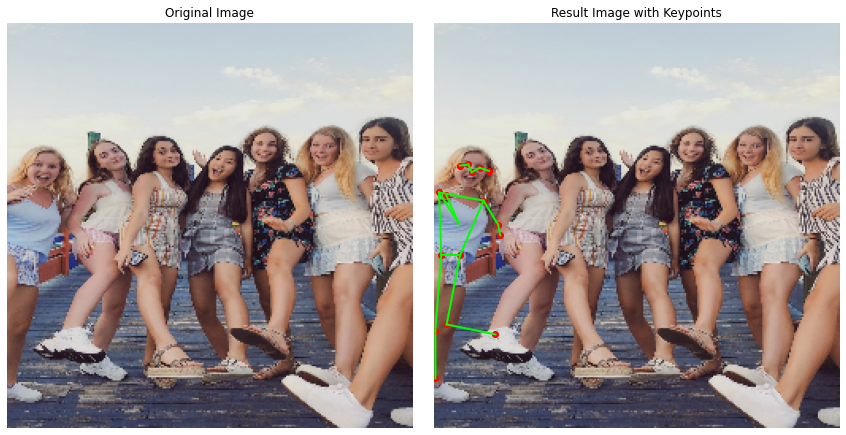


 **********************************************************************************************************************************


In [18]:
# Path to the directory containing the test images
image_dir = r"C:\Users\HP\Desktop\Pose estimation\test images"

# Get a list of all image files in the directory
image_files = [f for f in os.listdir(image_dir) if f.lower().endswith(('.jpg', '.jpeg', '.png'))]

# Loop through each image and perform pose estimation
for image_file in image_files:
    image_path = os.path.join(image_dir, image_file)

    # Load the image
    image = tf.io.read_file(image_path)
    image = tf.io.decode_image(image, channels=3)  # Use decode_image for general image formats
    
    # Resize the image to the expected input size of the model
    image = tf.image.resize(image, (256, 256))
    
    # Add a batch dimension
    image = tf.expand_dims(image, axis=0)
    
    keypoints_with_scores = movenet(image)
    
    # Process keypoints and plot
    plt.figure(figsize=(12, 6))
    
    plt.subplot(1, 2, 1)
    plt.imshow(image[0].numpy().astype('uint8'))
    plt.title("Original Image")
    plt.axis('off')
    
    plt.subplot(1, 2, 2)
    plot_keypoints_and_connections(image[0], keypoints_with_scores[0], connections)
    plt.title("Result Image with Keypoints")
    plt.axis('off')
    
    plt.tight_layout()
    plt.show()

    print("\n","*"*130)